시계열 분석:  
* 전통적으로 시계열의 자기회귀(AR) 특성을 기반으로  
가격이나 수익률의 미래값을 예측 시도하는 분야  
* Trading 측면에서 주로 향후 가격의 향방(상승/하락)을 예측하는 방식으로 사용  
* 기존 통계적 기법들 & Machine Learning 알고리즘 등이 시계열 분석에 많이 사용  
최근 Auto-Encoder, Transformer 등을 이용한 시계열 Anomaly Detection에 관한 연구 활발히 진행 중  

해당 프로젝트:  
ML 모델을 이용해 시계열을 분석, 향후 주가의 향방(모멘텀) 작용 방향 예측 모델 구축 방법 확인  

추세 판단이 중요한 이유, 사용 분야  
Long / Short 전략  
동시에 상대적으로 비싼 종목을 팔고, 싼 주식을 사는 방식으로 진행  
상승 구간에서는 Long 매수 포지션 / 하락 구간에서는 Short 매도 포지션  
이러한 Trading 전략에 추세, 모멘텀 판단 알고리즘이 필수적  
(회사의 로보어드바이져 모델인 fAI에는 거시경제의 흐름인 경기예측 모델과 함께 각 종목의 모멘텀 포착 모델이 포함되어 있습니다.)
  
학습목표  
* 시계열 데이터의 분류기 개발을 위한 Data Labeling 방식에 대해 학습  
* 예측하려는 값에 대한 설명력 높은 Feature를 선정하는 방식에 대해 학습  
* 분류기 성능을 높이기 위한 방안을 학습  

① 추세(Trend)와 데이터
- 추세란 일정한 방향으로 나아가려는 것, 주식에서 상승 혹은 하락 혹은 꾸준히 유지되는 것
- 추세(Trend)와 모멘텀(Momentum)의 차이
- 업비트(Upbit)의 이더리움 분봉 데이터
- 지도학습 기반의 이진 분류기(binary classification)

② 환경구성
- 필요 패키지 설치
- 데이터 불러오기

추세, Trend, Momentum
* 추세: 가격이 일정한 방향으로 일정 기간 꾸준히 유지되는 것  
* 보합: 상승 또는 하락 어느 방향으로도 움직이지 않고 정체되어 있는 상태  
    금융시장에서 가격의 방향성이 끊임없이 변화  
    수익이 나지 않더라도 최소한 많이 잃지 않는 최고의 방법  
* 모멘텀: 추세를 판단할 수 있는 지표로, 상승 또는 하락의 추세가 유지되는 동력  

추세구간 여부 판단 방법  
    모멘텀, 추세를 미리 파악하는 것이 중요
    전통적으로 추세관련 기술적 지표들 & 시계열 분석 등 통계적 기법으로 파악 시도  

해당 프로젝트: 기계학습으로 추세 판단(모멘텀 포착)  

활용 데이터  
이더리움 2017-00-00 ~ 2019-00-00 분봉  

분류기 개발 방안  
지도학습 기반 분류기 개발  
상승: 1 / 하락: 0 으로 Labeling  
분류기는 RandomForest 기반 Bagging 분류기

# Momentum(Trend) Labeling

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

<Axes: xlabel='time'>

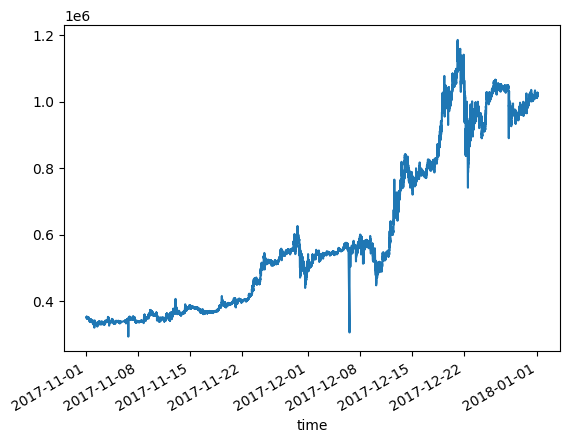

In [2]:
# 이 데이터는 17년 11월 12월 2달간의 변화 close는 종가
DATA_PATH = '.'
modify_data = pd.read_csv(os.path.join(DATA_PATH, 'sub_upbit_eth_min_tick.csv'), index_col=0, parse_dates=True)
modify_data.loc['2017-11-01':'2017-12-31','close'].plot()

① 데이터 라벨링  

추세(Trend)를 Labeling하는 4가지 예시 방법
* Price Change Direction  
* Using Moving Average  
* Local Min-Max  
* Trend Scanning  

1. Price Change Direction  
현재 가격과 특정 영업일 이전의 가격의 차이로 Labeling  
며칠 전 가격과 비교할 것인지에 따라 변동이 커질 수 있어 주의 필요  
간단히 Labeling 가능  

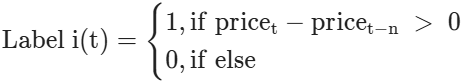  
먼저 window를 설정  
보통 window는 시계열 데이터에서 이전 시점과 현재 시점간의 간격을 구간별로 잘라서 사용  
정확한 예측을 달성하기 위해 우리가 가지고 있는 정보를 과거로부터 주어진 시점에서 가능한 안전하게 보존된 정보를 모델에 제공하기 위해 Window로 다시 구성한 다음 모델에 input으로 주입하는 것  
window는 보통 time series data 외에도 많이 사용하는 기법입니다.(ex. 정렬 알고리즘, CNN의 sliding 등...)

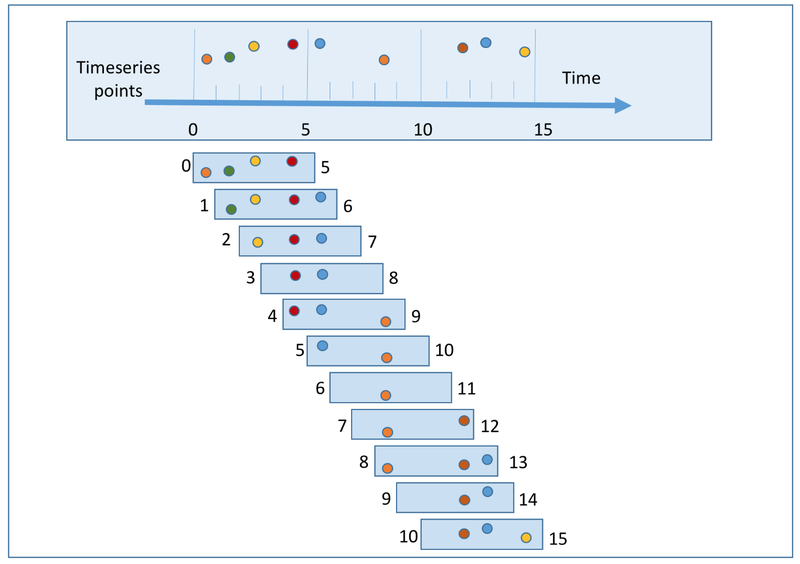  
[https://docs.wavefront.com/query_language_windows_trends.html]

<Axes: xlabel='time'>

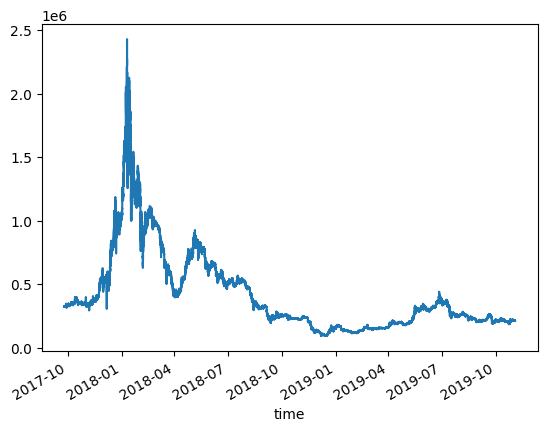

In [3]:
# 전체 데이터는 19년도까지 있다
modify_data['close'].plot()

In [4]:
window = 10
momentum_signal = np.sign(np.sign(modify_data['close'] - modify_data['close'].shift(window)) + 1)
s_momentum_signal = pd.Series(momentum_signal, index=modify_data.index)

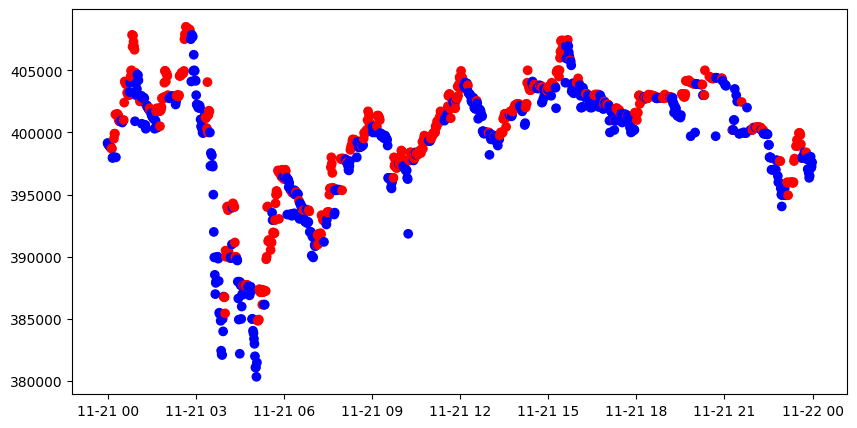

In [5]:
sub_data = modify_data.loc['2017-11-21', 'close']
c_sig = s_momentum_signal.loc['2017-11-21']
c_sig['color'] = np.where(c_sig == 1, 'red', 'blue')

plt.figure(figsize=(10,5))
plt.scatter(sub_data.index, sub_data, c=c_sig['color'])

In [6]:
s_momentum_signal.head(15)

,close
time,
2017-09-25 03:00:00,NaN
2017-09-25 03:01:00,NaN
2017-09-25 03:02:00,NaN
2017-09-25 03:05:00,NaN
2017-09-25 03:06:00,NaN
2017-09-25 03:07:00,NaN
2017-09-25 03:10:00,NaN
2017-09-25 03:11:00,NaN
2017-09-25 03:12:00,NaN


2. Using Moving Average  
기술적 지표(Moving Average) 활용  
현재 주가가 특정 이동평균선 위/아래에 있는지 여부로 Labeling  
기준 이동평균 일수 결정 필요  
이동평균으로 인해 Lag(지연)가 발생  
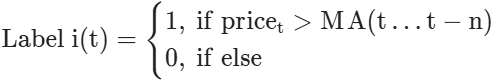

In [7]:
momentum_signal = np.sign(np.sign(modify_data['close'] - modify_data['close'].rolling(window).mean()) + 1)
s_momentum_signal = pd.Series(momentum_signal, index=modify_data.index)

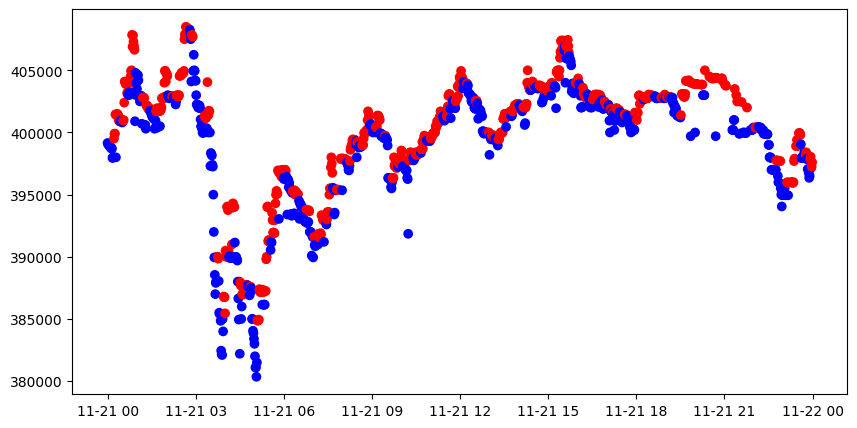

In [8]:
sub_data = modify_data.loc['2017-11-21', 'close']
c_sig = s_momentum_signal.loc['2017-11-21']
c_sig['color'] = np.where(c_sig == 1, 'red', 'blue')

plt.figure(figsize=(10,5))
plt.scatter(sub_data.index, sub_data, c=c_sig['color'])

In [9]:
s_momentum_signal.head(15)

,close
time,
2017-09-25 03:00:00,NaN
2017-09-25 03:01:00,NaN
2017-09-25 03:02:00,NaN
2017-09-25 03:05:00,NaN
2017-09-25 03:06:00,NaN
2017-09-25 03:07:00,NaN
2017-09-25 03:10:00,NaN
2017-09-25 03:11:00,NaN
2017-09-25 03:12:00,NaN


3. Local Min-Max  
국지적인 최소 / 최대값을 계속 갱신하여, 최소-최대 구간을 이어나가며 Labeling  

국지적 최소 최대를 갱신할 수 있는 여러 방법 존재  

해당 알고리즘은 계속해서 최소, 최대값을 갱신하다가,  
서로 상대방값으로 초기화하는 것이 핵심  

e.g.  
현재 하락구간, 최소값이 계속 갱신되는 상황  
이전 최대값 3,000원, 직전까지 최소값은 2,800원  
현재가격 2,750원으로 감소 시 최소값 갱신  

이후 가격 2,800원으로 상승 시  
현재 하락구간 종료 가정 하에 최소값 갱신 중지,  
이전 최대값을 현재 최소값인 2,750원으로 변경,  
앞으로 상승구간에서 최대값 갱신이 가능하도록 조정  

현재가격 한 번 상승 시 바로 하락구간 종료 가정하면,  
빈번한 Labeling의 변화가 있을 수 있으므로, 좀 더 변동이 적은 작업을 위해 Wait 계수를 설정  
상승구간에서의 과정도 하락구간과 동일  

순차적인 가격 확인 필요 -> 데이터가 증가 시, 선형적으로 연산시간도 증가하는 단점  

또한, 앞선 방식들과 마찬가지로 Wait 계수를 작게하면 변동성이 커질 수 있어, 신중한 계수선택 요구  

[Pseudo-code]  
𝐼𝑛𝑖𝑡𝑖𝑎𝑙𝑖𝑧𝑒 𝑣𝑎𝑟𝑖𝑎𝑏𝑙𝑒𝑠𝑓𝑜𝑟 𝑖 𝑖𝑛 𝑑𝑎𝑡𝑎𝑠𝑒𝑡:  
    𝑖𝑓 𝑐𝑢𝑟𝑟𝑒𝑛𝑡𝑝𝑟𝑖𝑐𝑒<𝑝𝑟𝑒𝑣𝑖𝑜𝑢𝑠𝑚𝑖𝑛𝑝𝑟𝑖𝑐𝑒  
        𝑚𝑖𝑛𝑝𝑟𝑖𝑐𝑒←𝑐𝑢𝑟𝑟𝑒𝑛𝑡𝑝𝑟𝑖𝑐𝑒  
        𝑝𝑎𝑠𝑠𝑖𝑛𝑔 𝑡ℎ𝑟𝑜𝑢𝑔ℎ 𝑡ℎ𝑒 𝐹𝑎𝑙𝑙𝑖𝑛𝑔 𝑇𝑟𝑒𝑛𝑑  
        𝑎𝑐𝑐𝑢𝑚𝑢𝑙𝑎𝑡𝑒𝑠𝑚𝑖𝑛𝑝𝑟𝑖𝑐𝑒  
    𝑖𝑓 𝑐𝑢𝑟𝑟𝑒𝑛𝑡𝑝𝑟𝑖𝑐𝑒>𝑝𝑟𝑒𝑣𝑖𝑜𝑢𝑠𝑚𝑎𝑥𝑝𝑟𝑖𝑐𝑒  
        𝑚𝑎𝑥𝑝𝑟𝑖𝑐𝑒←𝑐𝑢𝑟𝑟𝑒𝑛𝑡𝑝𝑟𝑖𝑐𝑒  
        𝑝𝑎𝑠𝑠𝑖𝑛𝑔 𝑡ℎ𝑟𝑜𝑢𝑔ℎ 𝑡ℎ𝑒 𝑅𝑖𝑠𝑖𝑛𝑔 𝑇𝑟𝑒𝑛𝑑  
        𝑎𝑐𝑐𝑢𝑚𝑢𝑙𝑎𝑡𝑒𝑠𝑚𝑎𝑥𝑝𝑟𝑖𝑐𝑒  
    𝑖𝑓 𝑒𝑛𝑑𝑠 𝑡ℎ𝑒 𝐹𝑎𝑙𝑙𝑖𝑛𝑔 𝑇𝑟𝑒𝑛𝑑  
        𝑚𝑎𝑥𝑝𝑟𝑖𝑐𝑒←𝑚𝑖𝑛𝑝𝑟𝑖𝑐𝑒  
    𝑖𝑓 𝑒𝑛𝑑𝑠 𝑡ℎ𝑒 𝑅𝑖𝑠𝑖𝑛𝑔 𝑇𝑟𝑒𝑛𝑑  
        𝑚𝑖𝑛𝑝𝑟𝑖𝑐𝑒←𝑚𝑎𝑥𝑝𝑟𝑖𝑐𝑒  

In [10]:
# Local min / max 를 추출하기 위한 함수
def get_local_min_max(close, wait=3):
    min_value = close.iloc[0]
    max_value = close.iloc[0]
    n_cnt_min, n_cnt_max = 0, 0

    mins, maxes = [], []
    min_idxes, max_idxes = [], []
    b_min_update, b_max_update = False, False

    for idx, val in zip(close.index[1:], close.values[1:]):
        if val < min_value:
            min_value = val
            mins.append(min_value)
            min_idxes.append(idx)
            n_cnt_min = 0
            b_min_update = True
        if val > max_value:
            max_value = val
            maxes.append(max_value)
            max_idxes.append(idx)
            n_cnt_max = 0
            b_max_update = True

        if not b_max_update:
            b_min_update = False
            n_cnt_min += 1
            if n_cnt_min >= wait:
                max_value = min_value
                n_cnt_min = 0

        if not b_min_update:
            b_max_update = False
            n_cnt_max += 1
            if n_cnt_max >= wait:
                min_value = max_value
                n_cnt_max = 0

    return pd.DataFrame.from_dict({'min_time': min_idxes, 'local_min': mins}), pd.DataFrame.from_dict({'max_time': max_idxes, 'local_max': maxes})

In [11]:
mins, maxes = get_local_min_max(sub_data, wait=3)

(376546.5, 412585.0)

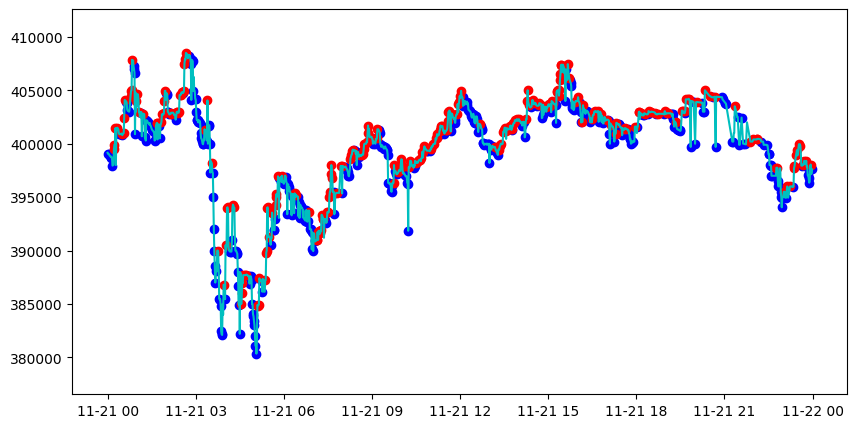

In [12]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.plot(sub_data, 'c')
ax.scatter(mins.min_time, mins.local_min, c='blue')
ax.scatter(maxes.max_time, maxes.local_max, c='red')
ax.set_ylim([sub_data.min() * 0.99, sub_data.max()  * 1.01])

(376546.5, 412585.0)

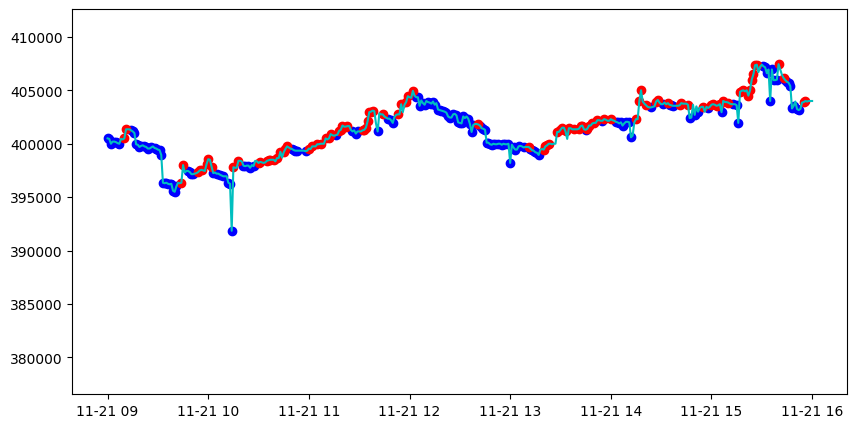

In [13]:
st_time, ed_time = '2017-11-21 09:00:00', '2017-11-21 16:00:00'

fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.plot(sub_data.loc[st_time:ed_time], 'c')
ax.scatter(mins.set_index('min_time', drop=False).min_time.loc[st_time:ed_time], mins.set_index('min_time').local_min.loc[st_time:ed_time], c='blue')
ax.scatter(maxes.set_index('max_time', drop=False).max_time.loc[st_time:ed_time], maxes.set_index('max_time').local_max.loc[st_time:ed_time], c='red')
ax.set_ylim([sub_data.min() * 0.99, sub_data.max()  * 1.01])

In [14]:
mins

,min_time,local_min
0,2017-11-21 00:01:00,399050
1,2017-11-21 00:03:00,399000
2,2017-11-21 00:04:00,398900
3,2017-11-21 00:05:00,398850
4,2017-11-21 00:06:00,398800
...,...,...
472,2017-11-21 23:48:00,397850
473,2017-11-21 23:50:00,397050
474,2017-11-21 23:52:00,396750
475,2017-11-21 23:53:00,396350


In [15]:
## 책에 없는 코드 라벨링까지 마무리 하는 코드를 짜봅시다

# 1. 극소/극대 포인트 합치기
extrema_df = pd.concat([
    mins.rename(columns={'min_time': 'time', 'local_min': 'value'}).assign(type='min'),
    maxes.rename(columns={'max_time': 'time', 'local_max': 'value'}).assign(type='max')
])

# 2. 시간 순으로 정렬
extrema_df = extrema_df.sort_values(by='time').reset_index(drop=True)

# 3. 각 구간의 변화 방향 라벨링
trend_labels = []
for i in range(len(extrema_df) - 1):
    current_val = extrema_df.loc[i, 'value']
    next_val = extrema_df.loc[i+1, 'value']
    label = 1 if next_val > current_val else 0
    trend_labels.append(label)

# 마지막 포인트는 라벨 없음 → NaN 또는 0 처리
trend_labels.append(0)

# 4. 최종 결과
extrema_df['label'] = trend_labels
print(extrema_df.head(15))


                  time   value type  label
0  2017-11-21 00:01:00  399050  min      0
1  2017-11-21 00:03:00  399000  min      0
2  2017-11-21 00:04:00  398900  min      0
3  2017-11-21 00:05:00  398850  min      0
4  2017-11-21 00:06:00  398800  min      0
5  2017-11-21 00:07:00  398800  min      0
6  2017-11-21 00:08:00  398700  min      0
7  2017-11-21 00:10:00  397950  min      1
8  2017-11-21 00:13:00  399500  max      1
9  2017-11-21 00:14:00  399900  max      1
10 2017-11-21 00:16:00  401450  max      0
11 2017-11-21 00:19:00  401350  max      1
12 2017-11-21 00:20:00  401500  max      0
13 2017-11-21 00:23:00  401000  min      0
14 2017-11-21 00:24:00  400900  min      0


https://github.com/hudson-and-thames/mlfinlab.git  

4. Trend Scanning  
(Marcos Lopez de Prado 의 저서 'Machine Learning for Asset Managers'에 소개된 Labeling 방식)  
시계열 데이터 𝑥(𝑡) x 𝑡 을 가격으로 가정  
현재 𝑡 시점에서 𝑡+𝑙 시점까지의 회귀식을 Fitting하여, 𝛽 값을 구합니다.  
이 𝛽 값의 𝑡𝑣𝑎𝑙𝑢𝑒 를 구합니다.  
max(𝑡𝑣𝑎𝑙𝑢𝑒) 의 부호를 통해 Labeling  

Tvalue  
: 두 대상이 평균적으로 얼마나 차이가 나는가를 표현  
t-value 값이 클수록 두 대상의 평균의 차이는 크다  
t-value는 두 대상을 '평균적'으로 비교  
가설로 구한 주가와 실제 주가의 t-value가 0에서 멀다면  
-> 가설로 구한 주가와 실제 주가는 차이가 크다  

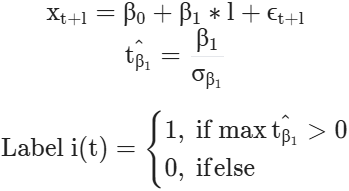  

In [16]:
def t_val_lin_r(close):
    import statsmodels.api as sml

    # t-value from a linear trend
    x = np.ones((close.shape[0], 2))
    x[:, 1] = np.arange(close.shape[0])
    ols = sml.OLS(close, x).fit()
    return ols.tvalues[1]

In [17]:
look_forward_window = 60
min_sample_length = 5
step = 1
t1_array = []
t_values_array = []

In [18]:
# 이 코드 블럭은 실행에 20~30분정도 걸립니다.

molecule = modify_data['2017-11-01':'2017-11-30'].index
label = pd.DataFrame(index=molecule, columns=['t1', 't_val', 'bin'])
tmp_out = []

for ind in tqdm(molecule):
    subset = modify_data.loc[ind:, 'close'].iloc[:look_forward_window]  # 전방 탐색을 위한 샘플 추출
    if look_forward_window > subset.shape[0]:
        continue

    tmp_subset = pd.Series(index=subset.index[min_sample_length-1:subset.shape[0]-1])
    tval = []

    # 회귀분석을 통해 t 통계량값을 이용하여 추세 추정
    for forward_window in np.arange(min_sample_length, subset.shape[0]):
        df = subset.iloc[:forward_window]
        tval.append(t_val_lin_r(df.values))

    tmp_subset.loc[tmp_subset.index] = np.array(tval)
    idx_max = tmp_subset.replace([-np.inf, np.inf, np.nan], 0).abs().idxmax()
    tmp_t_val = tmp_subset[idx_max]
    tmp_out.append([tmp_subset.index[-1], tmp_t_val, np.sign(tmp_t_val)])

label.loc[molecule] = np.array(tmp_out)  # prevent leakage

label['t1'] = pd.to_datetime(label['t1'])
label['bin'] = pd.to_numeric(label['bin'], downcast='signed')

100%|██████████| 33384/33384 [15:45<00:00, 35.31it/s]


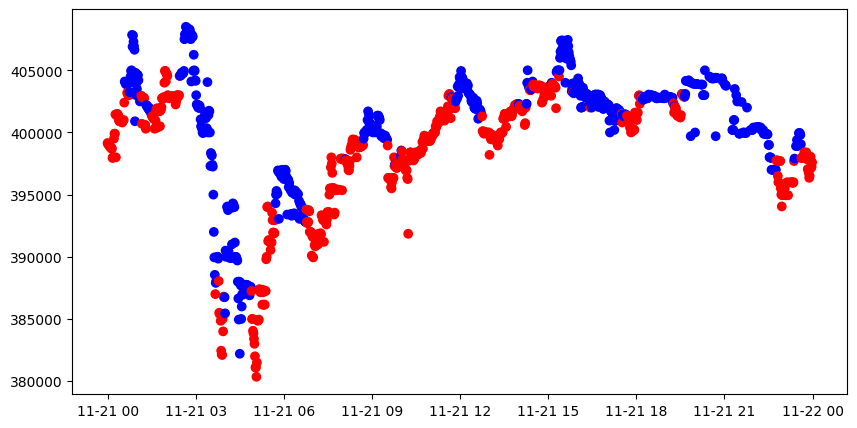

In [19]:
sub_data = modify_data.loc['2017-11-21', 'close']
c_sig = label['bin'].loc['2017-11-21']
c_sig['color'] = np.where(c_sig == 1, 'red', 'blue')

fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.scatter(sub_data.index, sub_data.values,
              c=c_sig['color'])

In [20]:
label.head(20)

,t1,t_val,bin
time,,,
2017-11-01 00:05:00,2017-11-01 06:10:00,-6.373987,-1
2017-11-01 00:12:00,2017-11-01 06:16:00,-6.273936,-1
2017-11-01 00:18:00,2017-11-01 06:23:00,-5.897474,-1
2017-11-01 00:24:00,2017-11-01 06:29:00,-5.425023,-1
2017-11-01 00:31:00,2017-11-01 06:35:00,-5.08177,-1
2017-11-01 00:37:00,2017-11-01 06:42:00,-4.895976,-1
2017-11-01 00:43:00,2017-11-01 06:48:00,-5.11334,-1
2017-11-01 00:50:00,2017-11-01 06:54:00,-4.866885,-1
2017-11-01 00:56:00,2017-11-01 07:00:00,-3.673143,-1


# Feature Engineering

Feature Engineering  
:도메인 지식을 활용하여 정제되지 않은 원본 자료(raw data)를  
탐색과 분석, 가공을 거쳐 특성추출 및 특성선택 하는 것  

① 환경구성 및 데이터 불러오기
- 필요 패키지 설치
- 데이터 불러오기

② Technical Index
- 기존 데이터셋(시가, 고가, 저가, 종가, 거래량)에서 기술적 지표(추세, 변동성, 거래량, 모멘텀)를 적용한 데이터셋 만들기
- 생성한 데이터셋에서 활용하고자 하는 시점에 대한 수익률, 변화율, 변동성을 적용

③ Feature Selection methods
- 특성선택(Feature Selection) 방법론 확인

* Feature Selection  
* Sequential Feature Selection  
* Shapley Additive explanations  

설명력 증가 & 성능 개선에 가장 중요한 요소 = 적절한 Feature 선택

Feature Selection 방법론 분류
1. Filter Method  
: Feature들간의 연관성을 찾는 방식  
(information gain, correlation coefficient 등)
2. Wrapper Method  
: 해결하고자 하는 문제에 대한 유용성을 측정하는 방식.  
Validation set에서의 성능이 최대화되는 Feature Set을 선정  
(Recursive Feature Elimination, Sequential Feature Selection 등)
3. Embedded Method  
: 훈련의 알고리즘에 Feature 선정과정이 포함되는 방식  
(Lasso, Ridge, Elastic Net 등)

해당 프로젝트에서는  
1. Wrapper Method 몇 가지에 대한 사용방법  
& Prodo 의 저서 'Advances in Financial ML'에서 소개된 방식 설명  
2. 주가 모멘텀 포착을 위해 사용할 수 있는 Feature들,  
Feature들 중 어떤 Feature를 선정해야 하는지 분석  
3. 'SHAP'라는 Feature 분석 패키지를 통해 Feature의 중요도를 확인  

환경구성 및 데이터 불러오기
① 환경구성
- ta, shap 패키지 설치 및 필요 패키지 불러오기

② 데이터 불러오기
- Feature Engineering을 적용할 데이터셋 불러오기

libs 설명  
libs 내부는 feature_engineering, feature_importance, mlutil 등의 파일로 구성, 해당 프로젝트 과정에서 필요한 코드를 작성하여 보관  

ta 설명  
Python Pandas 기반의 금융 시계열 데이터 분석을 지원하는 라이브러리  
자세한 내용은 ta 공식문서를 참고  

① 환경구성
ta, shap 패키지 설치 및 필요 패키지 불러오기

In [21]:
!pip install ta==0.9.0
!pip install shap

  Preparing metadata (setup.py) ... done
  Created wheel for ta: filename=ta-0.9.0-py3-none-any.whl size=28893 sha256=ce85e04e1053fac671d4a980a7332d5888496e33ba6289b85504937e5212a2aa
  Stored in directory: /root/.cache/pip/wheels/41/9d/74/9461cc3506f46d0ab93664f8168d974d944b57bb15f24d9e55
Successfully built ta


In [22]:
import datetime
import sys
import os
import re
import io
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ta

import sys

# 이거 두개는 LMS에서는 내부 파일이 존재함
# sys.path.append('/aiffel/aiffel/fnguide/data/')
# from libs.feature_importance import importance as imp

from sklearn.feature_selection import SequentialFeatureSelector, RFECV

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, VotingClassifier

Feature Engineering을 적용할 데이터셋 불러오기  

Pickle(.pkl)  
: Python의 list, class, dictionary와 같은 자료형(type)을 바이너리로 변환하여 파일로 저장된 것  
일반적으로 파일은 텍스트로 저장되며 파이썬의 자료형은 객체로 저장되는데,  
객체 상태로는 바로 사용할 수 없기 때문에  
컴퓨터가 이해할 수 있는 바이너리로 저장되어 사용

In [23]:
"""
mlfinlab
"""

"""
Module which implements feature importance algorithms as described in Chapter 8 of Advances in Financial Machine
Learning and Clustered Feature Importance algorithms as described in Chapter 6 Section 6.5.2 of Machine Learning for
Asset Managers.
"""

import pandas as pd
import numpy as np
from sklearn.metrics import log_loss


def mean_decrease_impurity(model, feature_names, clustered_subsets=None):
    """
    Advances in Financial Machine Learning, Snippet 8.2, page 115.
    MDI Feature importance
    Mean decrease impurity (MDI) is a fast, explanatory-importance (in-sample, IS) method specific to tree-based
    classifiers, like RF. At each node of each decision tree, the selected feature splits the subset it received in
    such a way that impurity is decreased. Therefore, we can derive for each decision tree how much of the overall
    impurity decrease can be assigned to each feature. And given that we have a forest of trees, we can average those
    values across all estimators and rank the features accordingly.
    Tip:
    Masking effects take place when some features are systematically ignored by tree-based classifiers in favor of
    others. In order to avoid them, set max_features=int(1) when using sklearn’s RF class. In this way, only one random
    feature is considered per level.
    Notes:
    * MDI cannot be generalized to other non-tree based classifiers
    * The procedure is obviously in-sample.
    * Every feature will have some importance, even if they have no predictive power whatsoever.
    * MDI has the nice property that feature importances add up to 1, and every feature importance is bounded between 0 and 1.
    * method does not address substitution effects in the presence of correlated features. MDI dilutes the importance of
      substitute features, because of their interchangeability: The importance of two identical features will be halved,
      as they are randomly chosen with equal probability.
    * Sklearn’s RandomForest class implements MDI as the default feature importance score. This choice is likely
      motivated by the ability to compute MDI on the fly, with minimum computational cost.
    Clustered Feature Importance( Machine Learning for Asset Manager snippet 6.4 page 86) :
    Clustered MDI  is the  modified version of MDI (Mean Decreased Impurity). It  is robust to substitution effect that
    takes place when two or more explanatory variables share a substantial amount of information (predictive power).CFI
    algorithm described by Dr Marcos Lopez de Prado  in Clustered Feature  Importance section of book Machine Learning
    for Asset Manager. Here  instead of  taking the importance  of  every feature, we consider the importance of every
    feature subsets, thus every feature receive the importance of subset it belongs to.
    :param model: (model object): Trained tree based classifier.
    :param feature_names: (list): Array of feature names.
    :param clustered_subsets: (list) Feature clusters for Clustered Feature Importance (CFI). Default None will not apply CFI.
                              Structure of the input must be a list of list/s i.e. a list containing the clusters/subsets of feature
                              name/s inside a list. E.g- [['I_0','I_1','R_0','R_1'],['N_1','N_2'],['R_3']]
    :return: (pd.DataFrame): Mean and standard deviation feature importance.
    """
    # Feature importance based on in-sample (IS) mean impurity reduction
    feature_imp_df = {i: tree.feature_importances_ for i, tree in enumerate(model.estimators_)}
    feature_imp_df = pd.DataFrame.from_dict(feature_imp_df, orient='index')
    feature_imp_df.columns = feature_names

    # Make sure that features with zero importance are not averaged, since the only reason for a 0 is that the feature
    # was not randomly chosen. Replace those values with np.nan
    feature_imp_df = feature_imp_df.replace(0, np.nan)  # Because max_features = 1

    if clustered_subsets is not None:
        # Getting subset wise importance
        importance = pd.DataFrame(index=feature_names, columns=['mean', 'std'])
        for subset in clustered_subsets: # Iterating over each cluster
            subset_feat_imp = feature_imp_df[subset].sum(axis=1)
            # Importance of each feature within a subsets is equal to the importance of that subset
            importance.loc[subset, 'mean'] = subset_feat_imp.mean()
            importance.loc[subset, 'std'] = subset_feat_imp.std()*subset_feat_imp.shape[0]**-.5
    else:
        importance = pd.concat({'mean': feature_imp_df.mean(),
                                'std': feature_imp_df.std() * feature_imp_df.shape[0] ** -0.5},
                               axis=1)

    importance /= importance['mean'].sum()
    return importance


def mean_decrease_accuracy(model, X, y, cv_gen, clustered_subsets=None, sample_weight_train=None,
                           sample_weight_score=None, scoring=log_loss, random_state=42):
    """
    Advances in Financial Machine Learning, Snippet 8.3, page 116-117.
    MDA Feature Importance
    Mean decrease accuracy (MDA) is a slow, predictive-importance (out-of-sample, OOS) method. First, it fits a
    classifier; second, it derives its performance OOS according to some performance score (accuracy, negative log-loss,
    etc.); third, it permutates each column of the features matrix (X), one column at a time, deriving the performance
    OOS after each column’s permutation. The importance of a feature is a function of the loss in performance caused by
    its column’s permutation. Some relevant considerations include:
    * This method can be applied to any classifier, not only tree-based classifiers.
    * MDA is not limited to accuracy as the sole performance score. For example, in the context of meta-labeling
      applications, we may prefer to score a classifier with F1 rather than accuracy. That is one reason a better
      descriptive name would have been “permutation importance.” When the scoring function does not correspond to a
      metric space, MDA results should be used as a ranking.
    * Like MDI, the procedure is also susceptible to substitution effects in the presence of correlated features.
      Given two identical features, MDA always considers one to be redundant to the other. Unfortunately, MDA will make
      both features appear to be outright irrelevant, even if they are critical.
    * Unlike MDI, it is possible that MDA concludes that all features are unimportant. That is because MDA is based on
      OOS performance.
    * The CV must be purged and embargoed.
    Clustered Feature Importance( Machine Learning for Asset Manager snippet 6.5 page 87) :
    Clustered MDA is the modified version of MDA (Mean Decreased Accuracy). It is robust to substitution effect that takes
    place when two or more explanatory variables share a substantial amount of information (predictive power).CFI algorithm
    described by Dr Marcos Lopez de Prado  in Clustered Feature  Importance (Presentation Slides)
    https://papers.ssrn.com/sol3/papers.cfm?abstract_id=3517595. Instead of shuffling (permutating) all variables
    individually (like in MDA), we shuffle all variables in cluster together. Next, we follow all the  rest of the
    steps as in MDA. It can used by simply specifying the clustered_subsets argument.
    :param model: (sklearn.Classifier): Any sklearn classifier.
    :param X: (pd.DataFrame): Train set features.
    :param y: (pd.DataFrame, np.array): Train set labels.
    :param cv_gen: (cross_validation.PurgedKFold): Cross-validation object.
    :param clustered_subsets: (list) Feature clusters for Clustered Feature Importance (CFI). Default None will not apply CFI.
                              Structure of the input must be a list of list/s i.e. a list containing the clusters/subsets of feature
                              name/s inside a list. E.g- [['I_0','I_1','R_0','R_1'],['N_1','N_2'],['R_3']]
    :param sample_weight_train: (np.array) Sample weights used to train the model for each record in the dataset.
    :param sample_weight_score: (np.array) Sample weights used to evaluate the model quality.
    :param scoring: (function): Scoring function used to determine importance.
    :param random_state: (int) Random seed for shuffling the features.
    :return: (pd.DataFrame): Mean and standard deviation of feature importance.
    """

    if sample_weight_train is None:
        sample_weight_train = np.ones((X.shape[0],))

    if sample_weight_score is None:
        sample_weight_score = np.ones((X.shape[0],))

    fold_metrics_values, features_metrics_values = pd.Series(dtype='float64'), pd.DataFrame(columns=X.columns)
    # Generating a numpy random state object for the given random_state
    rs_obj = np.random.RandomState(seed=random_state)
    # Clustered feature subsets will be used for CFI if clustered_subsets exists else will operate on the single column as MDA
    feature_sets = clustered_subsets if clustered_subsets else [[x] for x in X.columns]
    for i, (train, test) in enumerate(cv_gen.split(X=X)):
        fit = model.fit(X=X.iloc[train, :], y=y.iloc[train], sample_weight=sample_weight_train[train])
        pred = fit.predict(X.iloc[test, :])

        # Get overall metrics value on out-of-sample fold
        if scoring == log_loss:
            prob = fit.predict_proba(X.iloc[test, :])
            fold_metrics_values.loc[i] = -scoring(y.iloc[test], prob, sample_weight=sample_weight_score[test],
                                                  labels=model.classes_)
        else:
            fold_metrics_values.loc[i] = scoring(y.iloc[test], pred, sample_weight=sample_weight_score[test])

        # Get feature specific metric on out-of-sample fold
        for j in feature_sets:
            X1_ = X.iloc[test, :].copy(deep=True)
            for j_i in j:
                rs_obj.shuffle(X1_[j_i].values)  # Permutation of a single column for MDA or through the whole subset for CFI
            if scoring == log_loss:
                prob = fit.predict_proba(X1_)
                features_metrics_values.loc[i, j] = -scoring(y.iloc[test], prob,
                                                             sample_weight=sample_weight_score[test],
                                                             labels=model.classes_)
            else:
                pred = fit.predict(X1_)
                features_metrics_values.loc[i, j] = scoring(y.iloc[test], pred,
                                                            sample_weight=sample_weight_score[test])

    importance = (-features_metrics_values).add(fold_metrics_values, axis=0)
    if scoring == log_loss:
        importance = importance / -features_metrics_values
    else:
        importance = importance / (1.0 - features_metrics_values).replace(0, np.nan)
    importance = pd.concat({'mean': importance.mean(), 'std': importance.std() * importance.shape[0] ** -.5}, axis=1)
    importance.replace([-np.inf, np.nan], 0, inplace=True)  # Replace infinite values

    return importance

In [24]:
DATA_PATH = '.'
anno_file_name = os.path.join(DATA_PATH, 'sub_upbit_eth_min_tick_label.pkl')
target_file_name = os.path.join(DATA_PATH, 'sub_upbit_eth_min_tick.csv')

In [25]:
df_modify_data = pd.read_csv(target_file_name, index_col=0, parse_dates=True)
df_label_data = pd.read_pickle(anno_file_name)
df_sub_modify_data = df_modify_data.loc[df_label_data.index]

# 학습 시간 단축을 위해 여기선 편의상 1000개의 데이터만 가져옵니다.
df_sub_modify_data = df_sub_modify_data.iloc[:1000]

In [26]:
df_sub_modify_data.head()

,open,high,low,close,volume
time,,,,,
2018-01-01 00:00:00,1028000,1028000,1026500,1028000,41.835689
2018-01-01 00:01:00,1028000,1029000,1026000,1028500,22.307810
2018-01-01 00:02:00,1028000,1029000,1028000,1028000,59.276102
2018-01-01 00:03:00,1028000,1028000,1014000,1014000,114.203740
2018-01-01 00:04:00,1020000,1027000,1014500,1025000,62.695404


In [27]:
df_label_data.head(), df_label_data.tail()

(time
 2018-01-01 00:00:00   -0.0
 2018-01-01 00:01:00   -0.0
 2018-01-01 00:02:00   -0.0
 2018-01-01 00:03:00   -1.0
 2018-01-01 00:04:00   -1.0
 Name: t_value, dtype: float64,
 time
 2019-11-03 10:29:00   NaN
 2019-11-03 10:30:00   NaN
 2019-11-03 10:31:00   NaN
 2019-11-03 10:32:00   NaN
 2019-11-03 10:33:00   NaN
 Name: t_value, dtype: float64)

In [28]:
df_label_data.value_counts()

,count
t_value,
-1.0,306636
-0.0,302963
1.0,299289


In [29]:
df_label_data.value_counts()

,count
t_value,
-1.0,306636
-0.0,302963
1.0,299289


① 기술적 지표
- 지표들을 기존의 데이터셋에 추가하는 과정

② 수익률 / 변동성 지표
- 지표들이 추가된 데이터셋에서 활용하고자 하는 시점에 수익률과 변동성 적용

수익률 / 변동성까지 적용된 데이터셋을 표준화(standardization)하고 fit_transform하여 RandomForest에 적용  
Feature Selection을 하기 위한 선행과정

① 기술적 지표  
: 시장의 주가 또는 거래량 데이터를 기반으로 주가의 향방을 예측하기 위해 고안된 지표

추세 지표  
* MACD, Moving Average Convergence/Divergence  
: 단기 이평선과 장기 이평선의 차이로 주가의 수렴/확산 정도를 나타내는 지표,  
'signal', 'average', 'diverence'로 구성  
https://en.wikipedia.org/wiki/MACD  

* ADX, Average Directional Movement  
: 금일 주가 움직임의 범위가 전일의 범위를 어느 방향으로 벗어났는지를 관찰, 추세의 강도를 추적하는 지표  
https://en.wikipedia.org/wiki/Average_directional_movement_index  

* TRIX, Triple Exponential  
: n-영업일 지수가중평균을 3번 연달아 실시한 후, 그 값의 기울기를 나타낸 지표  
https://en.wikipedia.org/wiki/Trix_(technical_analysis)  

* DPO, detrended price oscillator  
: 가장 최신의 가격 흐름에 반응하지 않도록 변위된 이동평균을 사용하여, 장기추세를 제거하기 위한 지표.  
중기 과매수 / 과매도 정도를 표시  
https://en.wikipedia.org/wiki/Detrended_price_oscillator  

* AROON, AROON  
: 추세의 강도와 변화를 식별하기 위한 지표,  
고가사이의 시간차와 저가사이의 시간차를 측정  
https://www.investopedia.com/terms/a/aroon.asp  

변동성 지표  
* ATR, Average True Range  
: 시장의 변동성을 측정하기 위한 지표,  
(고가 - 저가), (고가 - 전일종가)의 절대값, (저가 - 전일종가)의 절대값 중 큰값을 취하여, 이동평균  
https://www.investopedia.com/terms/a/atr.asp  

* UI, Ulcer Index  
: 가격 하락의 유지기간, 깊이를 통해 가격의 하락 위험을 측정하는 지표  
https://www.investopedia.com/terms/u/ulcerindex.asp  

거래량 지표  
* CMF, Chaikin Money Flow  
: 산출방식이 MACD와 유사,  
두 accumulation/distribution line의 EMA값의 차이를 통해 돈의 유입/유출을 파악하려는 지표  
https://www.investopedia.com/ask/answers/071414/whats-difference-between-chaikin-money-flow-cmf-and-money-flow-index-mfi.asp  

* MFI, Money Flow Index  
: 가격의 흐름과 거래량의 조합으로 모멘텀의 방향성을 나타내는 지표  
FI, Force Index : 가격과 거래량을 사용하여 가격의 움직임을 좌우하는 힘의 강도를 측정하는 지표  
https://www.investopedia.com/terms/f/force-index.asp  

* SMA EM, Ease of Movement  
: 가격의 상승/하락을 판단하기 위한 지표.  
가격의 변동성과 거래량을 통해 가격 흐름의 용이성을 측정  
https://www.investopedia.com/terms/e/easeofmovement.asp  

* VPT, Volume Price Trend  
: 가격의 변화 강도와 그 방향을 나타내는 지표.  
수요 / 공급의 균형을 측정  
https://www.investopedia.com/terms/v/vptindicator.asp  

모멘텀 지표  
* RSI, Relative Strength Index  
: 가격 흐름의 상대강도를 측정하는 지표.  
일정기간 내의 평균 수익과 손실의 강도를 비교  
https://www.investopedia.com/terms/r/rsi.asp  

* WR, Williams %R  
: 과매도 / 과매수를 측정하는 지표(-100 ~ 0).  
진입 / 청산 시점을 포착하는데 사용  
https://www.investopedia.com/terms/w/williamsr.asp  

Python의 TA 패키지를 이용하여 각 지표 산출 가능  
(ta 공식 문서 참고)  
https://technical-analysis-library-in-python.readthedocs.io/en/latest/index.html

① 기술적 지표
- 지표들을 기존의 데이터셋에 추가하는 과정

In [30]:
mt = 1
fillna = False
df_ = df_sub_modify_data.copy()
open, high, low, close, volume = 'open', 'high', 'low', 'close', 'volume'
cols = [open, high, low, close, volume]

## Volume Index
# Chaikin Money Flow
df_["volume_cmf"] = ta.volume.ChaikinMoneyFlowIndicator(
                        high=df_[high], low=df_[low], close=df_[close], volume=df_[volume], window=20*mt, fillna=fillna
                    ).chaikin_money_flow()
# Force Index
df_["volume_fi"] = ta.volume.ForceIndexIndicator(
                        close=df_[close], volume=df_[volume], window=15*mt, fillna=fillna
                    ).force_index()
# Money Flow Indicator
df_["volume_mfi"] = ta.volume.MFIIndicator(
                        high=df_[high],
                        low=df_[low],
                        close=df_[close],
                        volume=df_[volume],
                        window=15*mt,
                        fillna=fillna,
                    ).money_flow_index()
# Ease of Movement
df_["volume_sma_em"] = ta.volume.EaseOfMovementIndicator(
                            high=df_[high], low=df_[low], volume=df_[volume], window=15*mt, fillna=fillna
                        ).sma_ease_of_movement()

# Volume Price Trend
df_["volume_vpt"] = ta.volume.VolumePriceTrendIndicator(
                        close=df_[close], volume=df_[volume], fillna=fillna
                    ).volume_price_trend()

## volatility index
# Average True Range
df_["volatility_atr"] = ta.volatility.AverageTrueRange(
                            close=df_[close], high=df_[high], low=df_[low], window=10*mt, fillna=fillna
                        ).average_true_range()

# Ulcer Index
df_["volatility_ui"] = ta.volatility.UlcerIndex(
                            close=df_[close], window=15*mt, fillna=fillna
                        ).ulcer_index()

## trend index
# MACD
df_["trend_macd_diff"] = ta.trend.MACD(
                            close=df_[close], window_slow=25*mt, window_fast=10*mt, window_sign=9, fillna=fillna
                        ).macd_diff()

# Average Directional Movement Index (ADX)
df_["trend_adx"] = ta.trend.ADXIndicator(
                        high=df_[high], low=df_[low], close=df_[close], window=15*mt, fillna=fillna
                    ).adx()

# TRIX Indicator
df_["trend_trix"] = ta.trend.TRIXIndicator(
                        close=df_[close], window=15*mt, fillna=fillna
                    ).trix()

# Mass Index
df_["trend_mass_index"] = ta.trend.MassIndex(
                            high=df_[high], low=df_[low], window_fast=10*mt, window_slow=25*mt, fillna=fillna
                        ).mass_index()

# DPO Indicator
df_["trend_dpo"] = ta.trend.DPOIndicator(
                        close=df_[close], window=20*mt, fillna=fillna
                    ).dpo()

# Aroon Indicator
df_["trend_aroon_ind"] = ta.trend.AroonIndicator(close=df_[close], window=20, fillna=fillna).aroon_indicator()

## momentum index
# Relative Strength Index (RSI)
df_["momentum_rsi"] = ta.momentum.RSIIndicator(close=df_[close], window=15*mt, fillna=fillna).rsi()

# Williams R Indicator
df_["momentum_wr"] = ta.momentum.WilliamsRIndicator(
                        high=df_[high], low=df_[low], close=df_[close], lbp=15*mt, fillna=fillna
                    ).williams_r()

In [31]:
# 결과 확인
df_

,open,high,low,close,volume,volume_cmf,volume_fi,volume_mfi,volume_sma_em,volume_vpt,volatility_atr,volatility_ui,trend_macd_diff,trend_adx,trend_trix,trend_mass_index,trend_dpo,trend_aroon_ind,momentum_rsi,momentum_wr
time,,,,,,,,,,,,,,,,,,,,
2018-01-01 00:00:00,1028000,1028000,1026500,1028000,41.835689,NaN,NaN,NaN,NaN,-0.796083,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01 00:01:00,1028000,1029000,1026000,1028500,22.307810,NaN,NaN,NaN,NaN,-0.788285,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01 00:02:00,1028000,1029000,1028000,1028000,59.276102,NaN,NaN,NaN,NaN,-0.017967,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01 00:03:00,1028000,1028000,1014000,1014000,114.203740,NaN,NaN,NaN,NaN,-1.584121,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01 00:04:00,1020000,1027000,1014500,1025000,62.695404,NaN,NaN,NaN,NaN,-0.875176,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-01-01 16:35:00,1052500,1052500,1052500,1052500,6.084122,-0.232633,-2275.848327,71.279251,-3.186964e+12,0.007381,1416.425464,0.361107,652.357742,20.661135,-0.018034,23.066052,-225.0,-35.0,52.934202,-0.0
2018-01-01 16:36:00,1052500,1052500,1049500,1050000,9.205537,-0.165805,-4868.097577,67.762226,-3.097651e+12,-0.021866,1574.782918,0.349329,482.768654,21.007559,-0.016660,23.029259,-2100.0,-35.0,44.041843,-62.5
2018-01-01 16:37:00,1050000,1050000,1049000,1049000,3.472849,-0.161093,-4693.691500,74.267351,-5.977131e+12,-0.025173,1517.304626,0.342452,280.010175,21.537826,-0.015683,22.971985,-1925.0,-35.0,41.083991,-87.5


② 수익률 / 변동성 지표  

수익률, 변화율 지표  

* 현재가격(종가)과 직전 n-영업일 가격과의 비율:  
R(t) = ( close(t) / close(t-n) ) -1  

* 금일 거래량과 직전 n-영업일 거래량과의 비율:  
volumechange(t) = ( volume(t) / volume(t-n) ) -1

변동성 지표  
* 종가의 n-영업일 이동 표준편차
* 거래량의 n-영업일 이동 표준편차

In [32]:
windows_mom = [5, 10, 20]
windows_std = [30]

for i in windows_mom:
    df_[f'vol_change_{i}'] = df_.volume.pct_change(i).round(6)
    df_[f'ret_{i}'] = df_.close.pct_change(i).round(6)

for i in windows_std:
    df_[f'std_{i}'] = df_.close.rolling(i).std()
    df_[f'vol_std_{i}'] = df_.volume.rolling(i).std()

In [33]:
# 결과 확인
df_

,open,high,low,close,volume,volume_cmf,volume_fi,volume_mfi,volume_sma_em,volume_vpt,...,momentum_rsi,momentum_wr,vol_change_5,ret_5,vol_change_10,ret_10,vol_change_20,ret_20,std_30,vol_std_30
time,,,,,,,,,,,,,,,,,,,,,
2018-01-01 00:00:00,1028000,1028000,1026500,1028000,41.835689,NaN,NaN,NaN,NaN,-0.796083,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01 00:01:00,1028000,1029000,1026000,1028500,22.307810,NaN,NaN,NaN,NaN,-0.788285,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01 00:02:00,1028000,1029000,1028000,1028000,59.276102,NaN,NaN,NaN,NaN,-0.017967,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01 00:03:00,1028000,1028000,1014000,1014000,114.203740,NaN,NaN,NaN,NaN,-1.584121,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01 00:04:00,1020000,1027000,1014500,1025000,62.695404,NaN,NaN,NaN,NaN,-0.875176,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-01-01 16:35:00,1052500,1052500,1052500,1052500,6.084122,-0.232633,-2275.848327,71.279251,-3.186964e+12,0.007381,...,52.934202,-0.0,-0.817192,0.002381,-0.265538,0.003815,0.703781,0.000000,1811.600550,15.025354
2018-01-01 16:36:00,1052500,1052500,1049500,1050000,9.205537,-0.165805,-4868.097577,67.762226,-3.097651e+12,-0.021866,...,44.041843,-62.5,0.394890,0.000000,0.274989,0.001431,-0.625893,-0.002375,1787.568824,9.944774
2018-01-01 16:37:00,1050000,1050000,1049000,1049000,3.472849,-0.161093,-4693.691500,74.267351,-5.977131e+12,-0.025173,...,41.083991,-87.5,-0.279019,-0.001903,-0.609186,0.000477,-0.849066,-0.003325,1763.291071,9.932495


In [34]:
df_tmp_data = df_.join(df_label_data).dropna()
X, y = df_tmp_data.iloc[:, 5:-1], df_tmp_data.iloc[:, -1]

sc = StandardScaler()
X_sc = sc.fit_transform(X)
X_sc = pd.DataFrame(X_sc, index=X.index, columns=X.columns)

In [35]:
X_sc.head()

,volume_cmf,volume_fi,volume_mfi,volume_sma_em,volume_vpt,volatility_atr,volatility_ui,trend_macd_diff,trend_adx,trend_trix,...,momentum_rsi,momentum_wr,vol_change_5,ret_5,vol_change_10,ret_10,vol_change_20,ret_20,std_30,vol_std_30
time,,,,,,,,,,,,,,,,,,,,,
2018-01-01 00:43:00,1.035464,-0.186753,0.065427,0.391695,0.143181,1.474065,0.054076,0.103695,0.930692,-0.078062,...,-0.141586,0.073599,-0.268825,-0.053926,-0.273922,-0.077989,-0.359687,0.617241,-0.335632,0.273404
2018-01-01 00:44:00,1.054026,0.125880,-0.011156,0.814123,0.544363,1.478520,0.017250,0.639945,0.771813,-0.051294,...,0.344922,1.111779,-0.209690,2.237163,-0.263511,0.036043,-0.266915,0.940844,-0.262646,0.291664
2018-01-01 00:45:00,1.042978,-0.023653,0.063195,1.052689,0.218332,1.290057,-0.020738,0.714133,0.598850,-0.015958,...,0.067032,0.544625,-0.124252,0.554780,-0.278339,0.150308,-0.252720,0.942325,-0.237456,0.301886
2018-01-01 00:46:00,1.016133,0.880060,-0.281931,0.928143,1.068429,1.633699,-0.020738,1.434675,0.454452,0.071047,...,0.783648,1.457839,0.168697,2.536405,-0.228841,0.833801,-0.227291,1.672326,-0.022928,0.256716
2018-01-01 00:47:00,0.893440,0.486864,-0.562722,-0.026395,0.862103,1.942977,0.088583,0.921217,0.319680,0.131133,...,-0.191611,-0.257415,-0.080204,0.402681,-0.380178,0.036276,-0.340320,0.454122,-0.018291,0.317671


In [36]:
X_sc.shape

(957, 23)

In [37]:
rfc = RandomForestClassifier(class_weight='balanced')
rfc.fit(X_sc, y)

RandomForestClassifier(class_weight='balanced')

특성선택(Feature Selection)을 위한 기법

① Feature Selection
- MDI
- MDA

② Sequential Feature Selection
- RFE CV
- SFS

③ Shapley Additive explanations
- SHAP

① Feature Selection  
MDI, Mean Decrease Impurity  
Tree 계열 분류기에서 산출되는 Feature Importance 값을 사용한 Feature Selection 기법  
* In-Sample 방식 -> Train Set의 정확도를 기반으로 함  
* 모든 Feature가 어느 정도의 중요도를 갖습니다.  
(0<FI(i)<1)  
* 모든 Feature Importance 의 합은 1입니다.  
(∑FI(i)=1)  
* substitution effect를 해결하지 못함

In [38]:
# LMS와 다르게 우리는 함수를 직접 호출해줘서 imp. 을 지웠습니다
# feat_imp = imp.mean_decrease_impurity(rfc, X.columns)
feat_imp = mean_decrease_impurity(rfc, X.columns)

In [39]:
feat_imp

,mean,std
volume_cmf,0.045666,0.002012
volume_fi,0.041773,0.002163
volume_mfi,0.044440,0.002500
volume_sma_em,0.034335,0.001608
volume_vpt,0.023785,0.001656
volatility_atr,0.081311,0.003135
volatility_ui,0.044594,0.002263
trend_macd_diff,0.074381,0.004058
trend_adx,0.056733,0.002743
trend_trix,0.069975,0.002960


MDA, Mean Decrease Accuracy  
Tree 외의의 분류기에서도 사용가능한 Feature Selection 기법  
* OOS(Out-of-Sample) 방식 -> Test Set을 기준으로 정확도를 산출하는 방식  
* Accuracy 이외의 다른 성능지표를 사용 가능  
* MDI와 유사하게 substitution effect에서 자유롭지 X  
* MDI와 다르게 모든 Feature가 중요하다고 나오지 않을 수 있음  
(FI(i)∈R)  

연산 절차  
1. 분류기를 Fitting  
2. 성능지표에 따라 OOS 성능을 측정  
3. 순차적으로 각 Feature(i)에 대해 무작위로 섞은 후 OOS 성능을 기존값과 비교하는 작업을 전체 Feature에 대해 수행

In [40]:
svc_rbf = SVC(kernel='rbf', probability=True)
cv = KFold(n_splits=5)
feat_imp_mda = mean_decrease_accuracy(svc_rbf, X_sc, y, cv_gen=cv)

In [41]:
def plot_feature_importance(importance_df, save_fig=False, output_path=None):
    # Plot mean imp bars with std
    plt.figure(figsize=(10, importance_df.shape[0] / 5))
    importance_df.sort_values('mean', ascending=True, inplace=True)
    importance_df['mean'].plot(kind='barh', color='b', alpha=0.25, xerr=importance_df['std'], error_kw={'ecolor': 'r'})
    if save_fig:
        plt.savefig(output_path)
    else:
        plt.show()

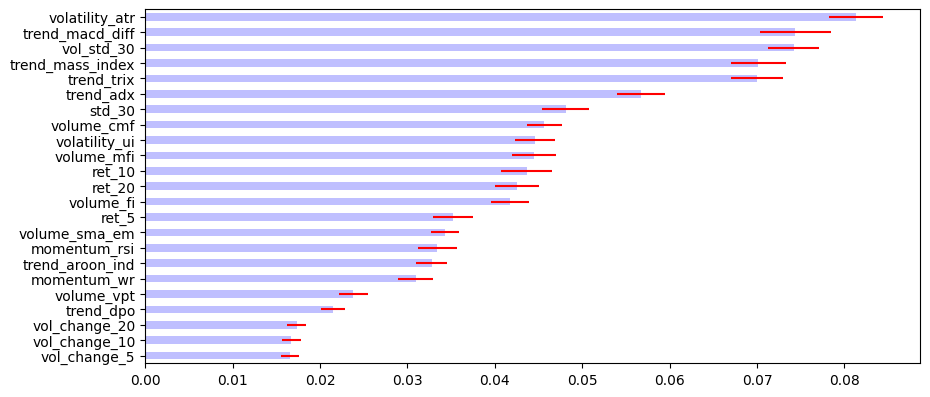

In [42]:
# volatility_atr : 시장의 변동성(진폭)을 측정하는 지표입니다
# Average True Range (ATR)
plot_feature_importance(feat_imp)

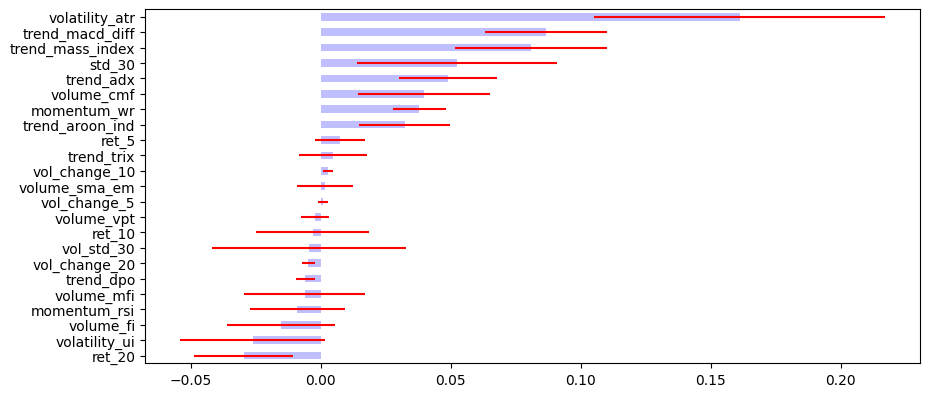

In [43]:
plot_feature_importance(feat_imp_mda)

② Sequential Feature Selection  
RFE CV, Recursive Feature Elimination  
* RFE방식에 CV를 도입한 기법  
* Data Set을 K개로 분할하여 학습과 검증을 동시에 진행하며,  
검증시 Feature의 기여도에 따라 삭제 여부를 결정하는 방식  
* Validation 성능이 가장 좋은 Feature를 최종 Feature로 결정

In [44]:
svc_rbf = SVC(kernel='linear', probability=True)
rfe_cv = RFECV(svc_rbf, cv=cv)
rfe_fitted = rfe_cv.fit(X_sc, y)

In [45]:
rfe_df = pd.DataFrame([rfe_fitted.support_, rfe_fitted.ranking_], columns=X_sc.columns).T.rename(columns={0:"Optimal_Features", 1:"Ranking"})
rfe_df

,Optimal_Features,Ranking
volume_cmf,False,12
volume_fi,False,4
volume_mfi,False,14
volume_sma_em,False,7
volume_vpt,False,8
volatility_atr,True,1
volatility_ui,False,11
trend_macd_diff,True,1
trend_adx,False,19
trend_trix,False,10


In [46]:
rfe_df[rfe_df["Optimal_Features"]==True]

,Optimal_Features,Ranking
volatility_atr,True,1
trend_macd_diff,True,1
std_30,True,1


SFS, Sequential Feature Selection  
순차적으로 Feature를 더하거나 빼는 방식으로 Feature의 최적조합을 찾는 방식  
* Backward / Forward 방식 모두 사용 가능
* Forward: Null에서 시작해 Feature를 하나씩 더해가는 방식으로 조합을 탐색
* Backwrd: 모든 Feature에서 시작해 하나씩 빼가는 방식으로 조합을 탐색




In [47]:
n = 2

sfs_forward = SequentialFeatureSelector(svc_rbf, n_features_to_select=n, direction='forward')
sfs_fitted = sfs_forward.fit(X_sc, y)

In [48]:
sfs_rank = sfs_fitted.get_support()

# 최신 버전은 {} 대신 []를 사용해야함
#sfs_df = pd.DataFrame(sfs_rank, index=X_sc.columns, columns={"Optimal_Features"})
sfs_df = pd.DataFrame(sfs_rank, index=X_sc.columns, columns=["Optimal_Features"])

sfs_df [sfs_df ["Optimal_Features"]==True].index

Index(['volume_mfi', 'trend_macd_diff'], dtype='object')

③ SHAP, Shapley Additive explanations  
게임이론 접근방식을 통해 분류기의 출력을 설명하기 위한 기법  
게임이론으로부터 Shapley Value를 추산하여, 이를 바탕으로 Feature를 설명  

Shapley Value  
: 게임이론에서 여러명의 플레이어에게 공정한 상벌을 배분하기 위한 솔루션으로,  
여러 플레이어의 공헌도는 서로 상이하지만, 상호간에 이득과 손실을 주고받는 상황에 적용되는 값  
게임 내에서 각 플레이어는 최대의 성과를 얻어내기 위한 의사결정을 연쇄적으로 수행,  
그러한 과정을 통해 얻게 된 게임의 결과에서 해당 플레이어에게 기대할 수 있는 평균적인 한계 공헌도를 의미

In [49]:
# !pip install --upgrade typing_extensions
# -> LMS에서 오류가남 버전 재설치를 해야한다
import shap
# 모델 output을 raw로 바꿔주기
explainer = shap.TreeExplainer(rfc, model_output="raw")
shap_value = explainer.shap_values(X_sc)

In [50]:
shap_value.shape

(957, 23, 3)

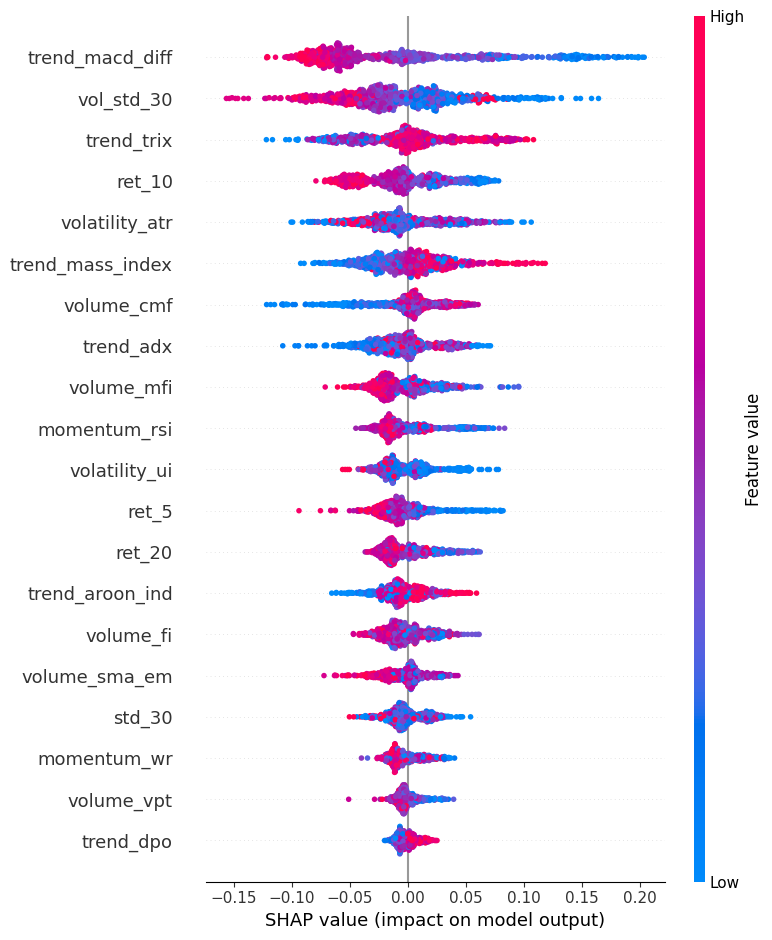

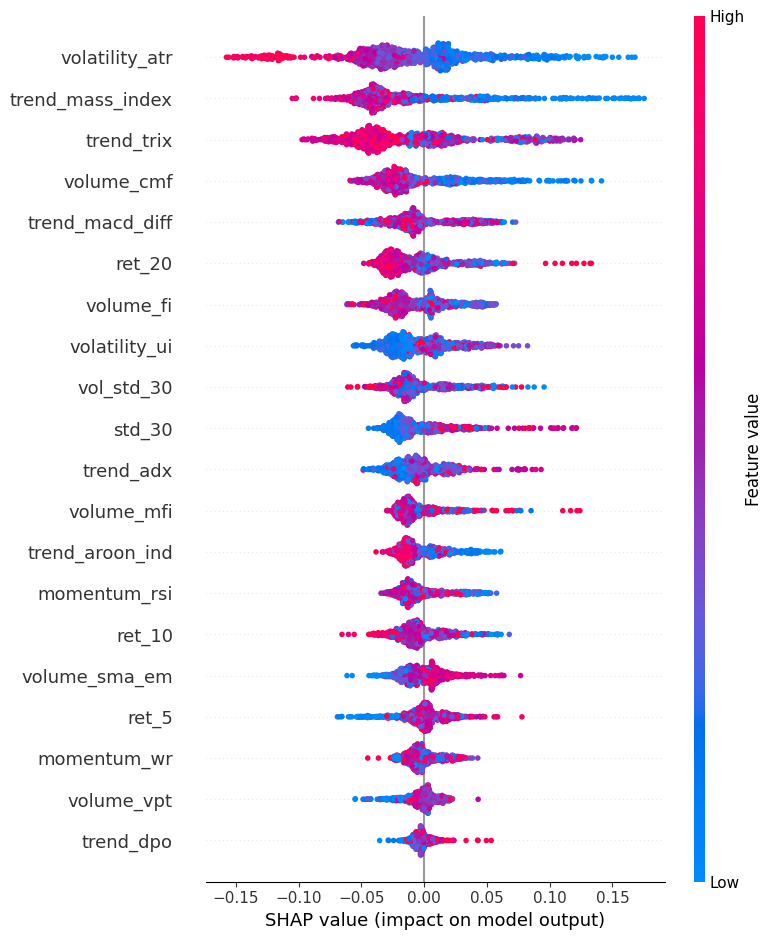

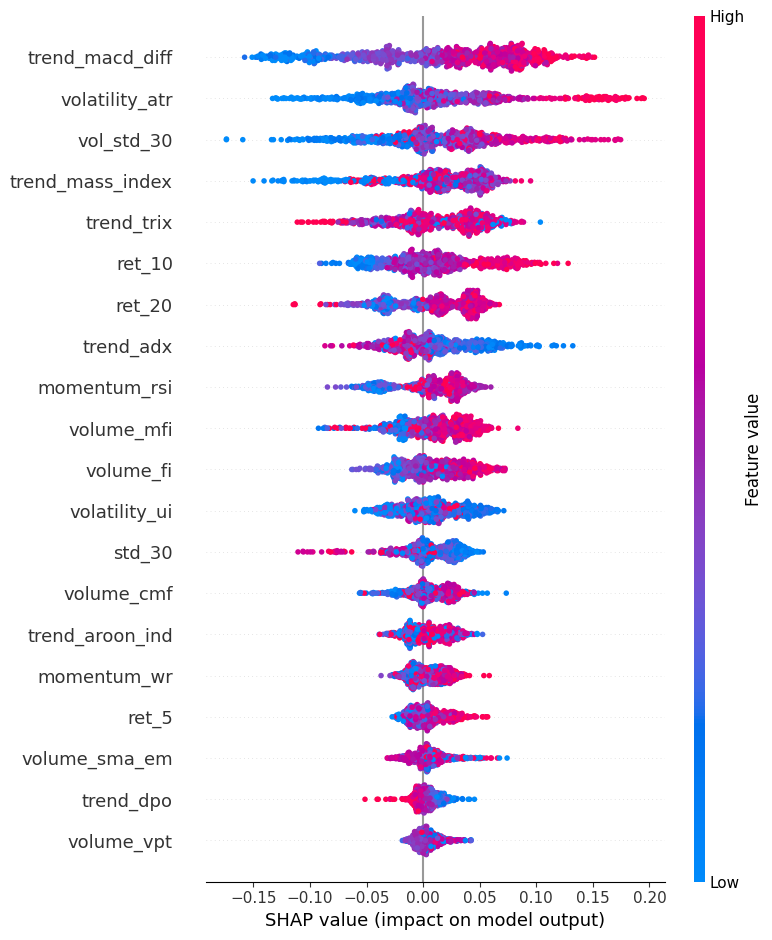

In [51]:
# 각 클래스에 대한 각각의 plot을 그려줘야함

# 클래스 0에 대한 SHAP summary plot
shap.summary_plot(shap_value[:, :, 0], X_sc, class_names='class 0')

# 클래스 1
shap.summary_plot(shap_value[:, :, 1], X_sc, class_names='class 1')

# 클래스 2
shap.summary_plot(shap_value[:, :, 2], X_sc, class_names='class 2')

In [52]:
# 절댓값 평균으로 전체 feature 중요도 요약
mean_shap = np.mean(np.abs(shap_value), axis=(0, 2))  # over samples and classes
shap_df = pd.Series(mean_shap, index=X_sc.columns).sort_values(ascending=False)
print(shap_df)

trend_macd_diff     0.048081
volatility_atr      0.038215
trend_trix          0.034844
trend_mass_index    0.033934
vol_std_30          0.033591
ret_10              0.024642
ret_20              0.022555
volume_cmf          0.021225
trend_adx           0.021188
volume_fi           0.019252
volume_mfi          0.019248
volatility_ui       0.019225
momentum_rsi        0.019028
std_30              0.016412
trend_aroon_ind     0.014552
ret_5               0.013051
volume_sma_em       0.012104
momentum_wr         0.011179
volume_vpt          0.007522
trend_dpo           0.006623
vol_change_20       0.003882
vol_change_10       0.003385
vol_change_5        0.003358
dtype: float64


In [53]:
output_file_name = os.path.join(DATA_PATH, 'sub_upbit_eth_min_feature_labels.pkl')
df_tmp_data.to_pickle(output_file_name)

# Model Training

PKFold 및 Model Traning 방법  

① 환경 구성
- 라이브러리 불러오기
- 데이터 불러오기

② Purged K-fold for Cross-Validation
- 기존의 Cross-Validation의 취약점인 Overfitting을 보완하기 위한 PKFold Cross Validation 사용

③ Find the best param for bagging(RandomForest) with grid-search
- 다음 순서로 학습 진행 (RandomForest -> Bagging -> GridSearchCV)
- Bagging은 RandomForest Classifier를 통해 생긴 오차의 분산을 줄이기 위해 사용
- GridSearchCV는 최적의 Parameter 값을 얻기 위해 사용

1. 환경 구성

In [54]:
import datetime
import sys
import os
import re
import io
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ta

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, roc_auc_score, roc_curve

# sys.path.append('/aiffel/aiffel/fnguide/data/')
# from libs.mlutil.pkfold import PKFold

In [55]:
"""
Created on Fri Dec  6 19:41:30 2019

@author: sukji
"""
from typing import Callable
import pandas as pd
import numpy as np

from sklearn.metrics import log_loss
from sklearn.model_selection import KFold
from sklearn.base import ClassifierMixin
from sklearn.model_selection import BaseCrossValidator

def ml_get_train_times1(samples_info_sets: pd.Series, test_times: pd.Series) -> pd.Series:
    # pylint: disable=invalid-name
    """
    Advances in Financial Machine Learning, Snippet 7.1, page 106.

    Purging observations in the training set

    This function find the training set indexes given the information on which each record is based
    and the range for the test set.
    Given test_times, find the times of the training observations.

    :param samples_info_sets: (pd.Series) The information range on which each record is constructed from
        *samples_info_sets.index*: Time when the information extraction started.
        *samples_info_sets.value*: Time when the information extraction ended.
    :param test_times: (pd.Series) Times for the test dataset.
    :return: (pd.Series) Training set
    """
    train = samples_info_sets.copy(deep=True)

    start = test_times.min()
    end = test_times.max()

    first = test_times.index[0]
    last = test_times.index[-1]

    df0 = train[(train < first) | (train.index > end)].index  # Train starts within test
    return df0

class PKFold(KFold):
    """
    Extend KFold class to work with labels that span intervals

    The train is purged of observations overlapping test-label intervals
    Test set is assumed contiguous (shuffle=False), w/o training samples in between

    :param n_splits: (int) The number of splits. Default to 3
    :param samples_info_sets: (pd.Series) The information range on which each record is constructed from
        *samples_info_sets.index*: Time when the information extraction started.
        *samples_info_sets.value*: Time when the information extraction ended.
    :param pct_embargo: (float) Percent that determines the embargo size.
    """

    def __init__(self,
                 n_splits: int = 3,
                 samples_info_sets: pd.Series = None,
                 pct_embargo: float = 0.):

        if not isinstance(samples_info_sets, pd.Series):
            raise ValueError('The samples_info_sets param must be a pd.Series')
        super(PKFold, self).__init__(n_splits, shuffle=False, random_state=None)

        self.samples_info_sets = samples_info_sets
        self.pct_embargo = pct_embargo

    # noinspection PyPep8Naming
    def split(self,
              X: pd.DataFrame,
              y: pd.Series = None,
              groups=None):
        """
        The main method to call for the PurgedKFold class

        :param X: (pd.DataFrame) Samples dataset that is to be split
        :param y: (pd.Series) Sample labels series
        :param groups: (array-like), with shape (n_samples,), optional
            Group labels for the samples used while splitting the dataset into
            train/test set.
        :return: (tuple) [train list of sample indices, and test list of sample indices]
        """
        if X.shape[0] != self.samples_info_sets.shape[0]:
            raise ValueError("X and the 'samples_info_sets' series param must be the same length")

        indices: np.ndarray = np.arange(X.shape[0])
        embargo: int = int(X.shape[0] * self.pct_embargo)

        test_ranges: [(int, int)] = [(ix[0], ix[-1] + 1) for ix in np.array_split(np.arange(X.shape[0]), self.n_splits)]
        for start_ix, end_ix in test_ranges:
            test_indices = indices[start_ix:end_ix]

            if end_ix < X.shape[0]:
                end_ix += embargo

            test_times = pd.Series(index=[self.samples_info_sets.index[start_ix]], data=[self.samples_info_sets[end_ix-1]])
            #train_times = ml_get_train_times(self.samples_info_sets, test_times)
            train_times = ml_get_train_times1(self.samples_info_sets, test_times)

            train_indices = []
            for train_ix in train_times:
                train_indices.append(self.samples_info_sets.index.get_loc(train_ix))
            yield np.array(train_indices), test_indices

In [56]:
DATA_PATH = '.'
data_file_name = os.path.join(DATA_PATH, 'sub_upbit_eth_min_feature_labels.pkl')

In [57]:
df_data = pd.read_pickle(data_file_name)
df_data['t_value'] = df_data['t_value'].apply(lambda x: x if x == 1 else 0)

In [58]:
df_data['t_value'].value_counts()

,count
t_value,
1.0,481
0.0,476


In [59]:
train_ratio, test_ratio = 0.7, 0.2
n_train = int(np.round(len(df_data) * train_ratio))
n_test = int(np.round(len(df_data) * test_ratio))

In [60]:
X, y = df_data.iloc[:, 5:-1], df_data.iloc[:, -1]

sc = StandardScaler()
X_sc = sc.fit_transform(X)

In [61]:
train_x, test_x, train_y, test_y = X_sc[:n_train, :], X_sc[-n_test:, :], y.iloc[:n_train], y.iloc[-n_test:]

train_x = pd.DataFrame(train_x, index=train_y.index, columns=X.columns)
train_y = pd.Series(train_y, index=train_y.index)
test_x = pd.DataFrame(test_x, index=test_y.index, columns=X.columns)
test_y = pd.Series(test_y, index=test_y.index)

# 학습 시간 단축을 위해 여기선 편의상 1000개의 데이터만 가져옵니다.
train_x = train_x[:1000]
train_y = train_y[:1000]

In [62]:
train_x

,volume_cmf,volume_fi,volume_mfi,volume_sma_em,volume_vpt,volatility_atr,volatility_ui,trend_macd_diff,trend_adx,trend_trix,...,momentum_rsi,momentum_wr,vol_change_5,ret_5,vol_change_10,ret_10,vol_change_20,ret_20,std_30,vol_std_30
time,,,,,,,,,,,,,,,,,,,,,
2018-01-01 00:43:00,1.035464,-0.186753,0.065427,0.391695,0.143181,1.474065,0.054076,0.103695,0.930692,-0.078062,...,-0.141586,0.073599,-0.268825,-0.053926,-0.273922,-0.077989,-0.359687,0.617241,-0.335632,0.273404
2018-01-01 00:44:00,1.054026,0.125880,-0.011156,0.814123,0.544363,1.478520,0.017250,0.639945,0.771813,-0.051294,...,0.344922,1.111779,-0.209690,2.237163,-0.263511,0.036043,-0.266915,0.940844,-0.262646,0.291664
2018-01-01 00:45:00,1.042978,-0.023653,0.063195,1.052689,0.218332,1.290057,-0.020738,0.714133,0.598850,-0.015958,...,0.067032,0.544625,-0.124252,0.554780,-0.278339,0.150308,-0.252720,0.942325,-0.237456,0.301886
2018-01-01 00:46:00,1.016133,0.880060,-0.281931,0.928143,1.068429,1.633699,-0.020738,1.434675,0.454452,0.071047,...,0.783648,1.457839,0.168697,2.536405,-0.228841,0.833801,-0.227291,1.672326,-0.022928,0.256716
2018-01-01 00:47:00,0.893440,0.486864,-0.562722,-0.026395,0.862103,1.942977,0.088583,0.921217,0.319680,0.131133,...,-0.191611,-0.257415,-0.080204,0.402681,-0.380178,0.036276,-0.340320,0.454122,-0.018291,0.317671
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-01-01 11:48:00,-0.401194,-0.656959,0.475561,-1.100167,-0.521844,1.844790,-0.113705,-0.282812,-0.360223,0.287789,...,-0.516289,-0.791551,0.022479,-1.231068,-0.267438,-0.410544,-0.263846,-0.738733,0.586925,0.396518
2018-01-01 11:49:00,-0.183171,-0.400958,0.585458,-1.100167,-0.085709,1.683858,-0.156036,-0.278606,-0.324160,0.297117,...,-0.032056,-0.099431,-0.228529,-0.642497,-0.196571,0.143791,-0.319728,0.911545,0.471733,0.351625
2018-01-01 11:50:00,-0.373766,-0.476587,0.944141,-1.018990,0.064538,1.346547,-0.186992,-0.345393,-0.290502,0.295249,...,-0.155044,-0.272461,-0.248446,-0.201379,-0.192556,-0.961155,-0.121272,1.230046,0.256260,0.119151


2. Purged K-fold for Cross-Validation  
Cross-Validation, 교차검증은 학습시 과적합을 막기 위한 하나의 방도로 데이터를 K개의 부분집합으로 나누어, K-1개의 부분집합으로 학습을 진행하고, 나머지 하나의 부분집합으로 검증을 진행하는 방식

Purged 개념  
: 학습데이터와 검증데이터를 나눌 때 두 시계열 사이의 연관성을 최대한 배제하기 위한 방법

K-fold CV의 단점  
* 관측치들이 Independent & Identical Distribution(IID) 상태에서 추출됐다고 가정하기 어려움  
* 테스트 집합 또한 모델 개발 과정에서 여러번 반복하여 사용되었을 가능성이 높음  
* 이 과정에서 여러 Bias가 반영되었을 가능성이 높음  
* Data Leakage는 학습데이터에 검증데이터와 유사한 패턴이 많이 담길수록 그 정도가 심해지는 경향 나타남  

e.g.  
자기상관이 강한 시계열의 Feature X, 그와 관련된 Label Y가 있다고 가정  
자기상관이 강한 시계열이므로  
X(t) ≈ X(t) + l  

Label이 중첩되어 있는 데이터에 의해 유도되었으므로  
Y(t) ≈ Y(t) + l  

이 경우, time t와 t+l의 데이터를 학습데이터와 검증데이터에 각각 둔다면, 정보의 누수가 발생  
예를 들어, t시점에 대한 데이터가 학습에, t+l에 대한 데이터가 검증데이터에 있다면,  
이 학습데이터로 학습된 분류기는 학습데이터에서 이미 경험한 t+l에 대한 예측성능이 좋을 것  
이러한 데이터가 많으면 많을수록 분류기의 성능은 과대하게 좋은 것으로 인식  
따라서, 정보의 누수를 최대한 줄이는 것이 분류기 성능의 객관성 확보에 중요  

* 모든 관측값에 대해 학습데이터와 검증데이터가 서로 최대한 상관되지 않도록 시계열 집합간 일종의 시간차를 두는 방식  
(Purged 방식, PKFold 클래스로 구현)  
* 분류기의 Overfitting을 막기 위한 방식  
(Early Stopping, Regulization 등)

In [63]:
n_cv = 4
t1 = pd.Series(train_y.index.values, index=train_y.index)
# purged K-Fold
cv = PKFold(n_cv, t1, 0)

3. fine tuning  
ROC, Receiver Operating Characteristic  
AUC, Area Under the Curve  
https://developers.google.com/machine-learning/crash-course/classification/roc-and-auc?hl=ko  
https://angeloyeo.github.io/2020/08/05/ROC.html  

RandomForest를 기반으로 분류기(Classifier) 학습  

분류기의 최적 Hyper Parameter를 찾기 위해 일단, GridSearchCV에 들어갈 값의 Parameter를 지정하고, RandomForest를 먼저 학습시킵니다.
RandomForest를 학습하고 나온 결과값을 Bagging을 통해 학습하며 이는 오차의 분산을 줄이기 위해 사용합니다.
이어서 앞서 GridSearchCV를 수행하기 위해 지정한 Parameter인 bc_params을 사용하고 GridSearch 클래스를 사용하여, fitting 합니다.
이렇게 찾아진, best_estimator_ 값을 기반으로 만든 분류기(Classifier)를 통해 얼마나 분류가 잘되었는지 확인합니다.
잠시 분류기의 검증 오차에 대해서 간략히 설명하고 넘어가겠습니다.

분류기를 통해 예측을 하려면 어쩔 수 없이 오차를 감수해야만 합니다.
얼마만큼 오차를 줄일 수 있느냐가 관건이겠죠.
우리는 오차의 평균이 최대한 '0'에 가깝도록 분산도 작게 가져가길 바랍니다.
어렵게 표현했지만, 쉽게 말하면 그저 실제값과 예측값이 최대한 같길 바란다는 뜻입니다.
여기서, 오차의 평균이 '0' 이 아니면, Bias, 편향되었다고 표현합니다.
그래서, unbiased estimate, 불편추정량이라는 것은 내가 예측하고자 하는 실제값과 오차가 '0'인 값이란 뜻입니다.
그러면, 과대적합, 과소적합을 이런 개념에서 정의해 보겠습니다.
underfitting, 과소적합: 오차의 평균이 Bias 되었으며, 분산이 작습니다.
overfitting, 과대적합: 오차의 평균도 작게 Bias 되었으며, 분산도 큽니다.
여기서, RandomForest를 Bagging으로 넘겨 학습을 진행하였습니다.

Bagging은 Bootstrap aggregating 에 약자로 분류기의 예측 오차의 분산을 감소시키기 위한 방법입니다.
Bootstrap은 데이터의 복원을 허용한 랜덤 표본 추출을 뜻하며,
이렇게 추출된 표본 데이터를 바탕으로 분류기를 병렬로 학습시키는 것을 Bagging이라고 합니다.
이와 달리 Boosting에서는 잘못 예측한 데이터에 가중치를 두어 순차적으로 분류기를 학습시키게 됩니다.
위에서 이야기한 오차의 분산을 획기적으로 줄이기 위하여 Bagging을 사용합니다.

In [64]:
# 최대 20분정도가 소요됩니다. 시간이 부족하다면 파라미터를 조절하여 진행하세요.
# 파라미터 명을 변경해야합니다
# 'base_estimator__max_depth': [3,5,10,20],
# base 모조리 빼버리기

bc_params = {'n_estimators': [5, 10, 20],
             'max_features': [0.5, 0.7],
             'estimator__max_depth': [3,5,10,20],
             'estimator__max_features': [None, 'auto'],
             'estimator__min_samples_leaf': [3, 5, 10],
             'bootstrap_features': [False, True]
            }

rfc = RandomForestClassifier(class_weight='balanced')
bag_rfc = BaggingClassifier(rfc)
gs_rfc = GridSearchCV(bag_rfc, bc_params, cv=cv, n_jobs=-1, verbose=1)
gs_rfc.fit(train_x, train_y)
gs_rfc_best = gs_rfc.best_estimator_

Fitting 4 folds for each of 288 candidates, totalling 1152 fits


In [65]:
gs_rfc_best.fit(train_x, train_y)

BaggingClassifier(bootstrap_features=True,
                  estimator=RandomForestClassifier(class_weight='balanced',
                                                   max_depth=3,
                                                   max_features=None,
                                                   min_samples_leaf=5),
                  max_features=0.7, n_estimators=5)

In [66]:
pred_y = gs_rfc_best.predict(test_x)  # [1,0,1,0,0,0,0]
prob_y = gs_rfc_best.predict_proba(test_x) # [[0.7,0.3]]

In [67]:
confusion = confusion_matrix(test_y, pred_y)
accuracy  = accuracy_score(test_y, pred_y)
precision = precision_score(test_y, pred_y)
recall    = recall_score(test_y, pred_y)

print('================= confusion matrix ====================')
print(confusion)
print('=======================================================')
print(f'정확도:{accuracy}, 정밀도:{precision}, 재현율:{recall}')

================= confusion matrix ====================
[[84 52]
 [13 42]]
정확도:0.6596858638743456, 정밀도:0.44680851063829785, 재현율:0.7636363636363637


auc:0.8088235294117647


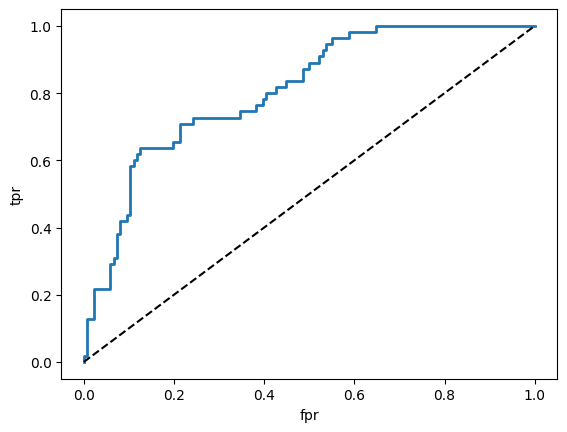

In [68]:
fpr, tpr, thresholds = roc_curve(test_y, prob_y[:,1])
auc = roc_auc_score(test_y, prob_y[:,1])
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
plt.xlabel('fpr')
plt.ylabel('tpr')
print(f'auc:{auc}')

# 정리  
1. Data Labeling  
데이터 라벨링 방법 4가지  
* Price Change Direction
* Using Moving Average
* Local Min-Max
* Trend Scanning
2. Feature Engineering  
Feature Engineering을 통한 특성선택(Feature Selection) 시도  
* Technical Index
* Feature Selection methods
* Feature Selection
* Sequential Feature Selection
* Shapley Additive explanations
3. Model Traning  
PKFold 활용 데이터셋  
RandomForest, Bagging, GridSearchCV 적용

PKFold parameter test

In [69]:
n_cv = 3
t1 = pd.Series(train_y.index.values, index=train_y.index)
# purged K-Fold
cv = PKFold(n_cv, t1, 0)

In [70]:
# n_cv = 5
# t1 = pd.Series(train_y.index.values, index=train_y.index)
# # purged K-Fold
# cv = PKFold(n_cv, t1, 0)

fine tuning, soft voting

In [76]:
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import roc_auc_score

svc = SVC(probability=True, random_state=42, kernel='rbf')
xgb = XGBClassifier(eval_metric='logloss', use_label_encoder=False, random_state=42)
gnb = GaussianNB()

svc_space ={
        'C': [0.001, 0.01, 0.1, 1],
        'gamma': [0.001, 0.01, 0.1, 1]
    }

xgb_space = {
        'n_estimators': [x for x in range(100, 1000, 100)],
        'max_depth': [x for x in range(1, 10)],
        'learning_rate': [x * 0.05 for x in range(1, 20)]
    }

In [77]:
gs_svc = GridSearchCV(svc, svc_space, cv=cv, n_jobs=-1, verbose=1)
gs_svc.fit(train_x, train_y)
gs_svc_best = gs_svc.best_estimator_

gs_xgb = GridSearchCV(xgb, xgb_space, cv=cv, n_jobs=-1, verbose=1)
gs_xgb.fit(train_x, train_y)
gs_xgb_best = gs_xgb.best_estimator_

Fitting 3 folds for each of 16 candidates, totalling 48 fits
Fitting 3 folds for each of 1539 candidates, totalling 4617 fits


In [78]:
gs_svc_best.fit(train_x, train_y)
gs_xgb_best.fit(train_x, train_y)
gnb.fit(train_x, train_y)

GaussianNB()

================= confusion matrix ====================
[[81 55]
 [10 45]]
정확도:0.6596858638743456, 정밀도:0.45, 재현율:0.8181818181818182
SVC(C=1, gamma=0.01, probability=True, random_state=42) auc:0.8172459893048128
================= confusion matrix ====================
[[77 59]
 [15 40]]
정확도:0.612565445026178, 정밀도:0.40404040404040403, 재현율:0.7272727272727273
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.9, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, mono

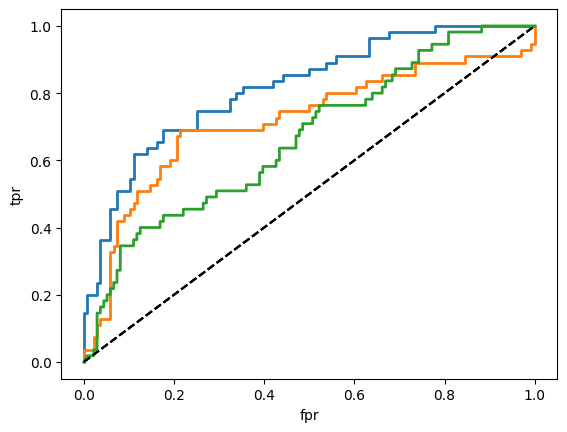

In [79]:
for clf in [gs_svc_best, gs_xgb_best, gnb]:
    pred_y = clf.predict(test_x)
    prob_y = clf.predict_proba(test_x)

    confusion = confusion_matrix(test_y, pred_y)
    accuracy  = accuracy_score(test_y, pred_y)
    precision = precision_score(test_y, pred_y)
    recall    = recall_score(test_y, pred_y)

    print('================= confusion matrix ====================')
    print(confusion)
    print('=======================================================')
    print(f'정확도:{accuracy}, 정밀도:{precision}, 재현율:{recall}')

    fpr, tpr, thresholds = roc_curve(test_y, prob_y[:,1])
    auc = roc_auc_score(test_y, prob_y[:,1])
    plt.plot(fpr, tpr, linewidth=2)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
    plt.xlabel('fpr')
    plt.ylabel('tpr')
    print(f'{clf} auc:{auc}')

In [80]:
from sklearn.ensemble import VotingClassifier

voting_clf = VotingClassifier(
    estimators=[('svc', gs_svc_best), ('xgb', gs_xgb_best), ('gnb', gnb)],
    voting='soft'
)

voting_clf.fit(train_x, train_y)
voting_clf.score(test_x, test_y)

0.6596858638743456

In [83]:
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score

print(roc_auc_score(test_y, voting_clf.predict_proba(test_x)[:,1]))
print(accuracy_score(test_y, voting_clf.predict(test_x)))
print(precision_score(test_y, voting_clf.predict(test_x)))
print(recall_score(test_y, voting_clf.predict(test_x)))

0.7377005347593583
0.6596858638743456
0.45
0.8181818181818182
